In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

c:\users\kylem\appdata\local\programs\python\python37\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
# import dataset into dataframe
df_boston = pd.read_csv('boston_data.csv',sep=',')

In [3]:
df_boston.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.1
2,16.62,"Van Dyk, Ernst F.",1,45.8,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.1,RSA,Paarl,76.1
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.2,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.6,36.58,JPN,Nogata Fukuoka,76.72


In [4]:
df_boston.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')

In [5]:
df_boston.dtypes

10k           object
name          object
division       int64
25k           object
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k           object
overall        int64
pace         float64
state         object
30k           object
5k            object
half          object
20k           object
country       object
city          object
40k           object
dtype: object

In [6]:
df_boston['10k'] = pd.to_numeric(df_boston['10k'],errors='coerce')
df_boston['25k'] = pd.to_numeric(df_boston['25k'],errors='coerce')
df_boston['official'] = pd.to_numeric(df_boston['official'],errors='coerce')
df_boston['30k'] = pd.to_numeric(df_boston['30k'],errors='coerce')
df_boston['5k'] = pd.to_numeric(df_boston['5k'],errors='coerce')
df_boston['half'] = pd.to_numeric(df_boston['half'],errors='coerce')
df_boston['20k'] = pd.to_numeric(df_boston['20k'],errors='coerce')
df_boston['40k'] = pd.to_numeric(df_boston['40k'],errors='coerce')

In [7]:
df_boston['40k'] = df_boston['40k'].dropna()

In [8]:
df_boston.dtypes

10k          float64
name          object
division       int64
25k          float64
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k           object
overall        int64
pace         float64
state         object
30k          float64
5k           float64
half         float64
20k          float64
country       object
city          object
40k          float64
dtype: object

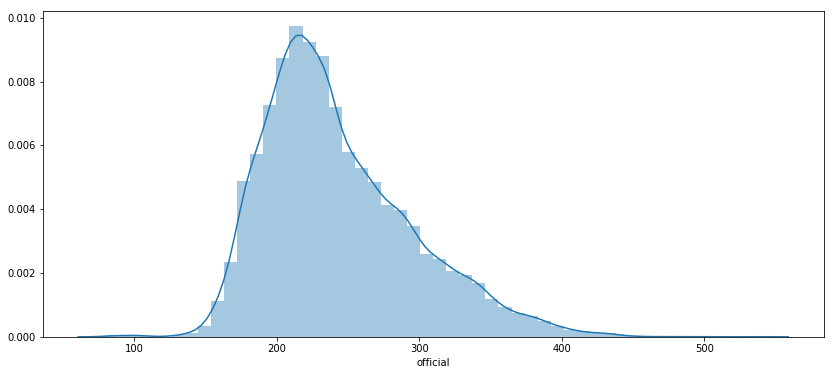

In [9]:
finish_times = df_boston['official'].dropna()

plt.figure(figsize=(14,6))
sns.distplot(finish_times)
plt.show()

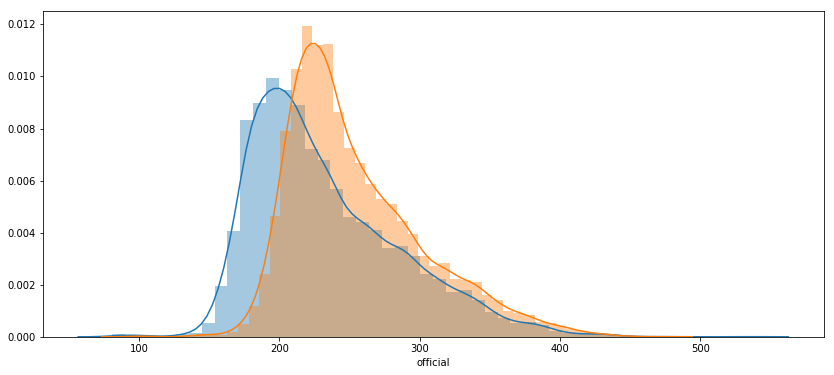

In [10]:
finish_times_M = df_boston[df_boston['gender']=='M']['official'].dropna()
finish_times_F = df_boston[df_boston['gender']=='F']['official'].dropna()

plt.figure(figsize=(14,6))
sns.distplot(finish_times_M)
sns.distplot(finish_times_F)
plt.show()

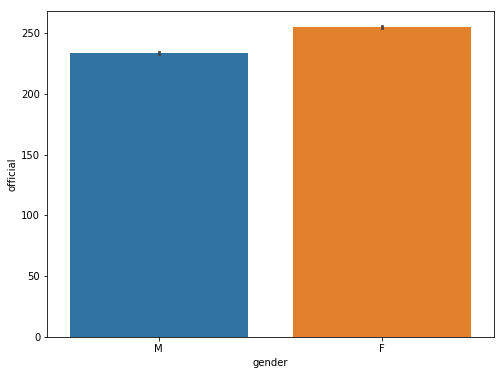

In [11]:
plt.figure(figsize=(8,6))
sns.barplot(x='gender',y='official',data=df_boston)
plt.show()

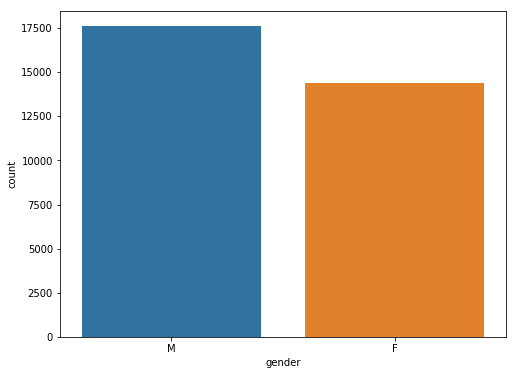

In [12]:
plt.figure(figsize=(8,6))
sns.countplot(x='gender',data=df_boston)
plt.show()

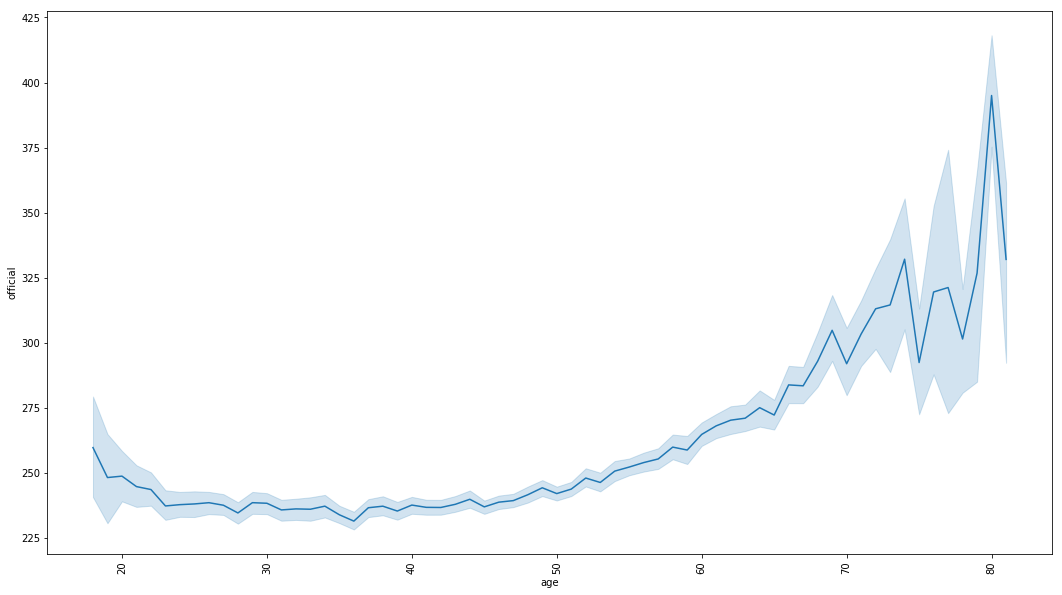

In [13]:
plt.figure(figsize=(18,10))
sns.lineplot(x='age',y='official',data=df_boston)
plt.xticks(rotation=90)
plt.show()

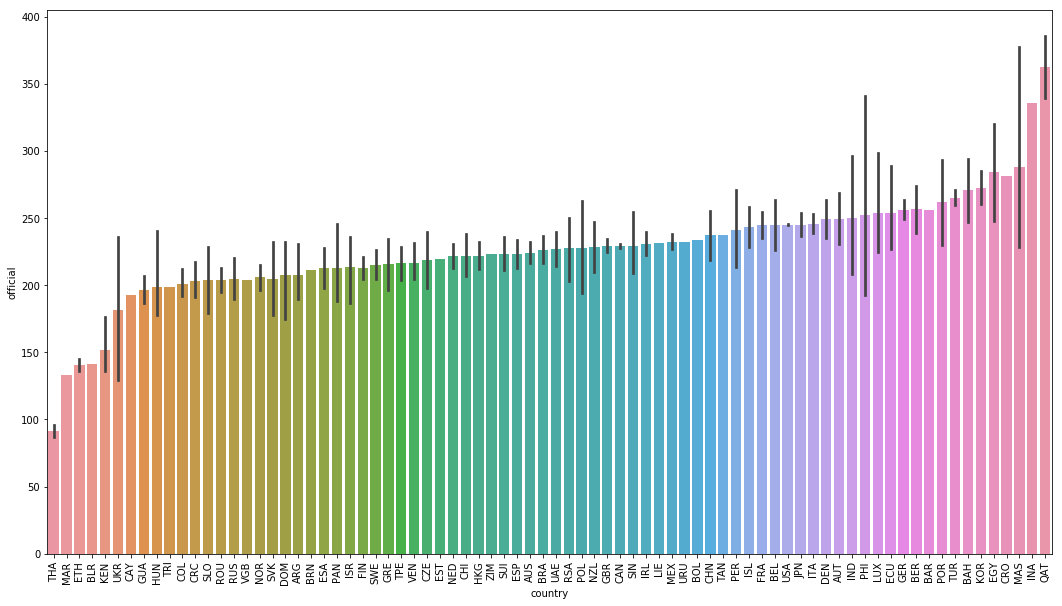

In [14]:
country_order = df_boston[['country','40k']].groupby(['country'],as_index=False).mean().sort_values(by='40k')['country']

plt.figure(figsize=(18,10))
sns.barplot(x='country',y='official',data=df_boston,order=country_order)
plt.xticks(rotation=90)
plt.show()

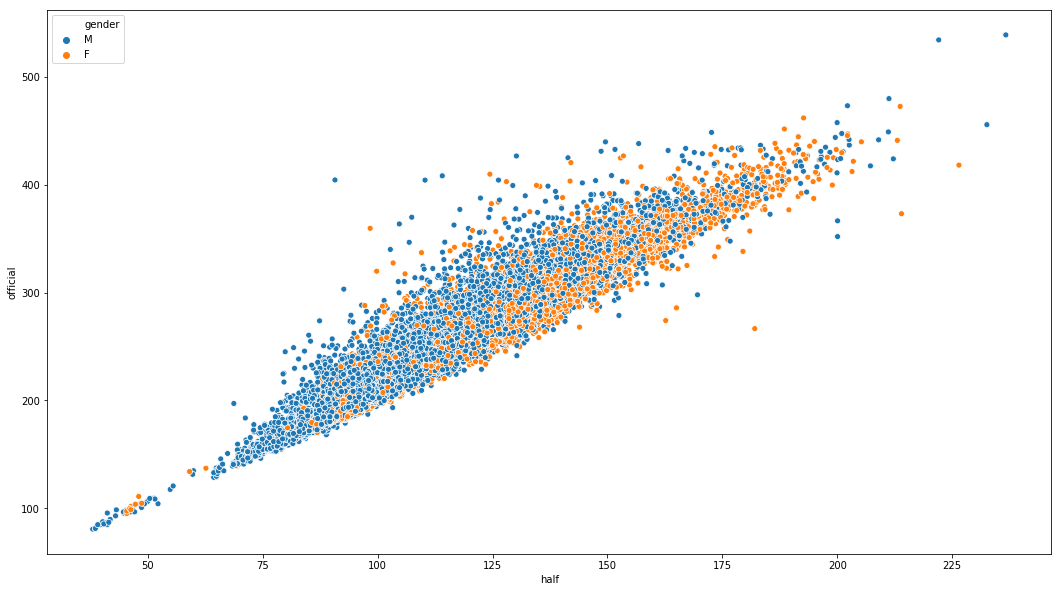

In [15]:
plt.figure(figsize=(18,10))
sns.scatterplot(x='half',y='official',data=df_boston,hue='gender')
plt.show()

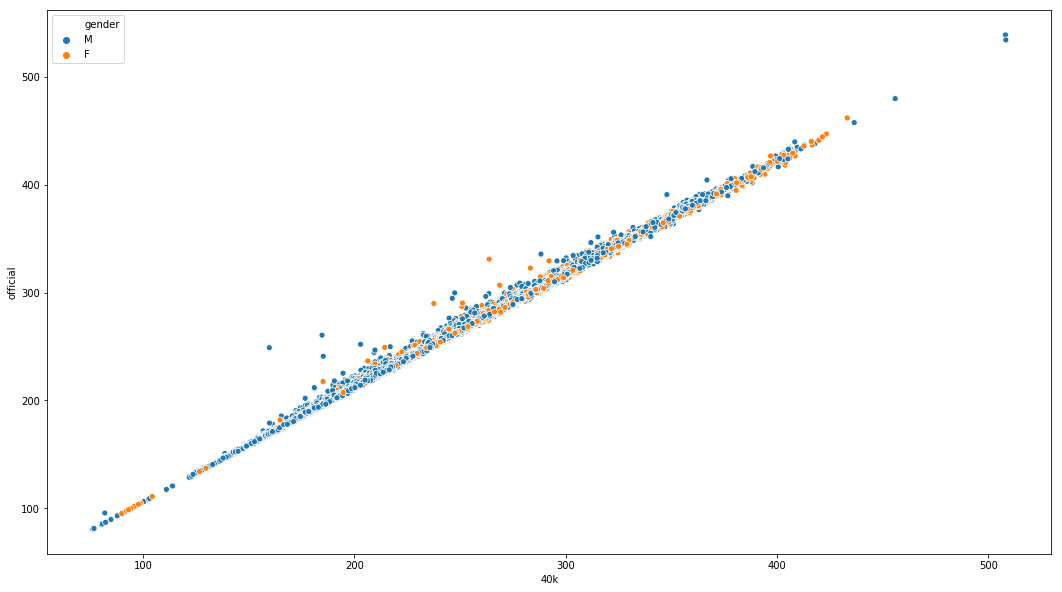

In [16]:
plt.figure(figsize=(18,10))
sns.scatterplot(x='40k',y='official',data=df_boston,hue='gender')
plt.show()

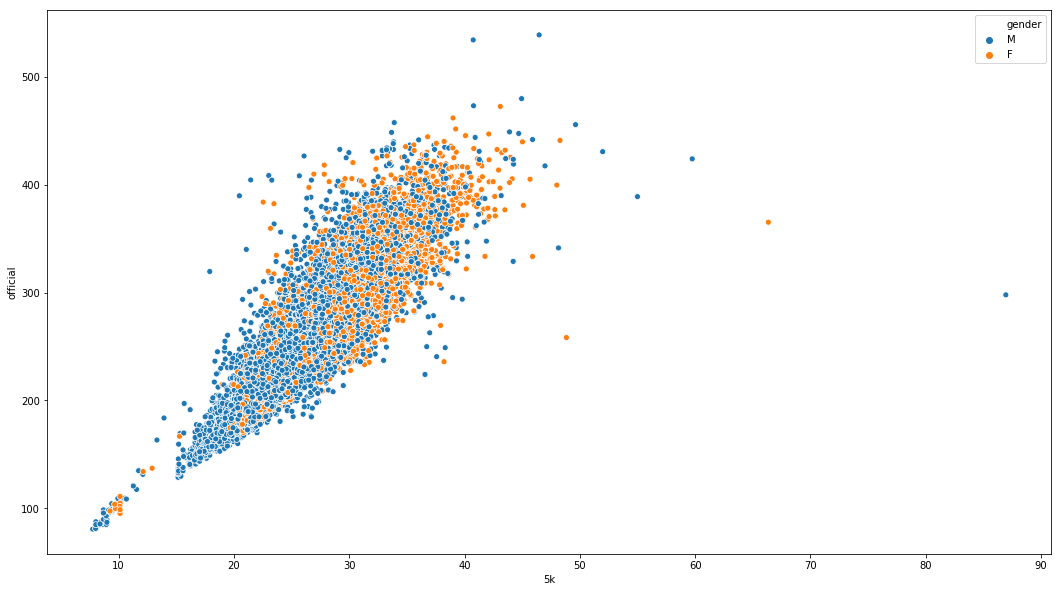

In [17]:
plt.figure(figsize=(18,10))
sns.scatterplot(x='5k',y='official',data=df_boston,hue='gender')
plt.show()

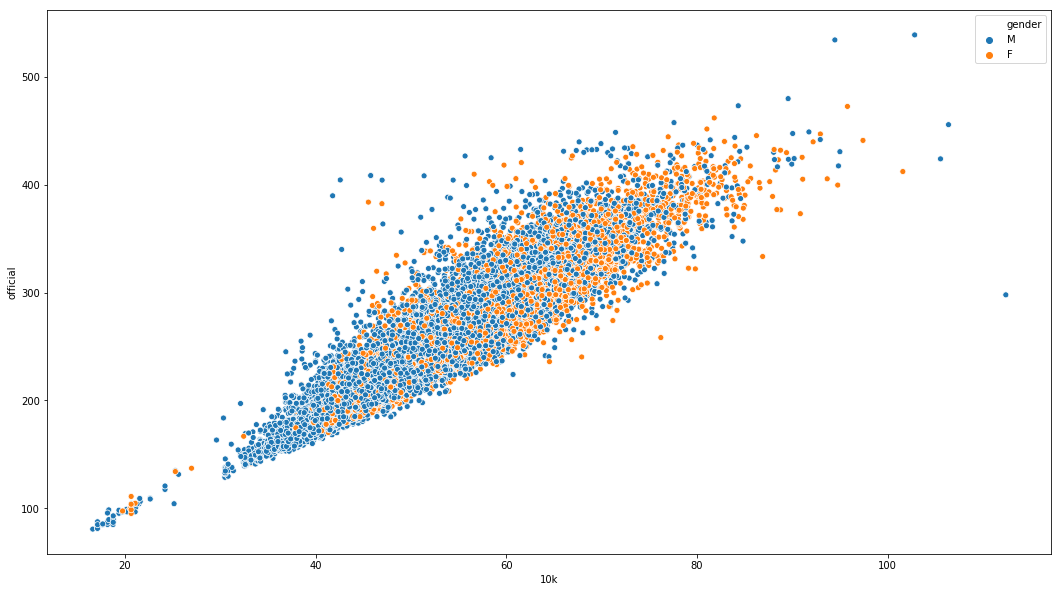

In [18]:
plt.figure(figsize=(18,10))
sns.scatterplot(x='10k',y='official',data=df_boston,hue='gender')
plt.show()

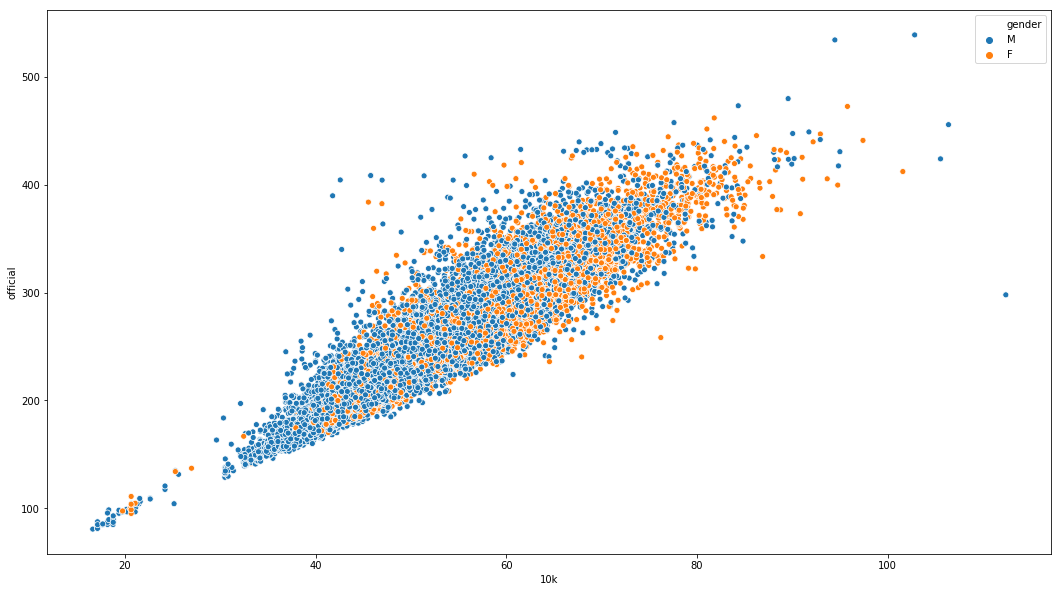

In [19]:
plt.figure(figsize=(18,10))
sns.scatterplot(x='10k',y='official',data=df_boston,hue='gender')
plt.show()

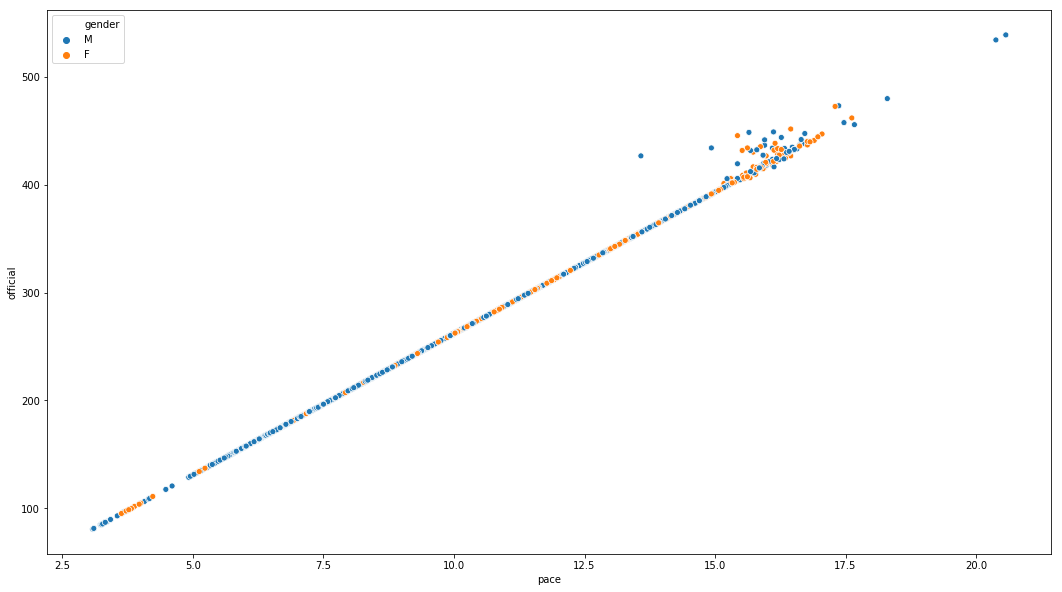

In [20]:
plt.figure(figsize=(18,10))
sns.scatterplot(x='pace',y='official',data=df_boston,hue='gender')
plt.show()

### Clustering

In [49]:
df_boston = df_boston.dropna(subset=['half'])

In [71]:
X = df_boston[['division', 'gender', 'age', 'genderdiv', 'overall', 'pace', 'state',
               'half', 'country']]
y = np.log(df_boston.official)
X = pd.get_dummies(X)

In [72]:
X_pca = PCA(6).fit_transform(X)

Comparing k-means clusters against the data:
official  4.494462  4.556820  4.645160  4.935049  4.947837  4.990433  \
row_0                                                                  
0                1         1         1         1         1         1   
1                0         0         0         0         0         0   
2                0         0         0         0         0         0   

official  4.994032  5.002805  5.028344  5.029653    ...     5.900719  \
row_0                                               ...                
0                1         1         1         1    ...            0   
1                0         0         0         0    ...            1   
2                0         0         0         0    ...            0   

official  5.908898  5.920183  5.933226  5.939724  5.947513  5.951762  \
row_0                                                                  
0                0         0         0         0         0         0   
1                

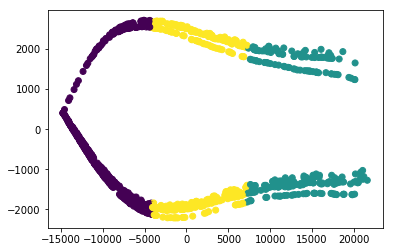

In [73]:
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [74]:
# MEAN SHIFT clustering
bandwidth = estimate_bandwidth(X, quantile=0.2)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 3


In [75]:
# SPATIAL Clustering
n_clusters=3
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X)

predict = sc.fit_predict(X)

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y,predict))

plt.scatter(X[:, 0], X[:, 1], c=predict)
plt.show()

c:\users\kylem\appdata\local\programs\python\python37\lib\site-packages\sklearn\manifold\spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
c:\users\kylem\appdata\local\programs\python\python37\lib\site-packages\sklearn\manifold\spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Comparing the assigned categories to the ones in the data:
col_0     0  1  2
official         
4.494462  1  0  0
4.556820  1  0  0
4.645160  1  0  0
4.935049  1  0  0
4.947837  1  0  0
4.990433  1  0  0
4.994032  1  0  0
5.002805  1  0  0
5.028344  1  0  0
5.029653  1  0  0
5.044908  1  0  0
5.051777  2  0  0
5.054844  1  0  0
5.063544  1  0  0
5.070350  1  0  0
5.073798  1  0  0
5.085310  1  0  0
5.087288  1  0  0
5.092092  2  0  0
5.096813  1  0  0
5.097302  1  0  0
5.098524  1  0  0
5.100293  1  0  0
5.100476  1  0  0
5.102728  1  0  0
5.103032  1  0  0
5.103214  1  0  0
5.104733  1  0  0
5.106127  1  0  0
5.109092  1  0  0
...      .. .. ..
5.787664  1  0  0
5.789715  1  0  0
5.791427  1  0  0
5.791854  1  0  0
5.795237  1  0  0
5.802632  1  0  0
5.810152  1  0  0
5.819549  1  0  0
5.821269  1  0  0
5.821506  1  0  0
5.830562  1  0  0
5.834284  1  0  0
5.843921  1  0  0
5.859988  1  0  0
5.863546  1  0  0
5.864540  1  0  0
5.867544  1  0  0
5.872737  1  0  0
5.874987  1  0  0
5.878

TypeError: unhashable type: 'slice'

In [76]:
# AFFINITY PROPAGATION
af = AffinityPropagation().fit(X)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 216
